# **Customer Churn Prediction: Bank Customers**

## Developed By Raj Purohith Arjun (UIN :535005964)


## **1.Objective**
The main goal of this project is to perform a comprehensive analysis of the bank's customer churn data to identify the key factors that lead to customer churn. Using advanced Exploratory Data Analysis (EDA) techniques, we will visualize patterns in the dataset to answer specific business-related questions. This project aims to understand the relationships between different variables (both quantitative and qualitative) and their impact on customer retention or churn, leading to actionable business insights.

### **Purpose**
Customer churn refers to the scenario where customers stop doing business with a company. Churn is a critical issue in industries like banking, where retaining customers is cheaper than acquiring new ones. The objective here is to analyze the customer churn data and conduct detailed statistical analysis to help the bank take preventive measures against customer attrition.


## **2. Dataset Description**

The dataset used for this project focuses on bank customers and includes features related to demographics, account details, and usage. The primary aim is to analyze customer churn, which refers to customers who have left the bank. Understanding the factors that influence customer churn can provide actionable insights for improving retention strategies.

**Data Set Source:** [Kaggle - Bank Customer Churn Prediction Dataset](https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction)

### Dataset Characteristics:
- **Rows (Observations):** 10,000 customers
- **Columns (Variables):** The dataset contains 14 variables. Below is a summary of the key variables included:

  - **CustomerId:** Unique identifier for each customer (irrelevant for churn prediction).
  - **Gender:** The customer's gender (Male/Female).
  - **Age:** The age of the customer (integer).
  - **Balance:** The balance in the customer's bank account (numeric).
  - **EstimatedSalary:** The customer's estimated annual salary (numeric).
  - **CreditScore:** The customer's credit score (integer).
  - **NumOfProducts:** The number of bank products the customer is using (integer).
  - **IsActiveMember:** Indicates if the customer is an active member (binary).
  - **HasCrCard:** Indicates if the member has a credit card (binary).

### Target Variable:
- **Exited:** Indicates whether the customer has exited the bank (1 = Exited, 0 = Not Exited).

### Variable Types:
- **Qualitative (Categorical) Variables:** 
  - Gender
  - Geography
  - HasCrCard
  - IsActiveMember
  
- **Quantitative Variables:** 
  - Age
  - Balance
  - CreditScore
  - EstimatedSalary

### Irrelevant Variables:
- **RowNumber:** Just an index, adds no value to the analysis.
- **CustomerId:** Unique identifier, irrelevant to customer behavior or churn prediction.
- **Surname:** Personal identifier, not linked to churn behavior and unnecessary for analysis.


## **3.Data Pre-Processing**

### 3.1  Importing the Dataset

In this step, we import the necessary Python libraries (`pandas`, `numpy`, `seaborn`, and `matplotlib`) and load the customer churn dataset. We display the first few rows of the dataset to familiarize ourselves with the structure.

---



In [158]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('churn.csv')

# Display the first few rows of the dataset
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3.2  Data Cleaning
In this step, we will:


Handle Missing Values


Remove Duplicates


Correct Data Inconsistencies

### 3.2.1. Handling Missing Values
First, we checked for any missing values in the dataset. If missing values were present, we could either impute them using the mean, median, or mode, or remove rows/columns with missing data. For this project, we chose to drop rows with missing values for simplicity, ensuring that the dataset is clean.

---


In [160]:
# Checking for missing values
df.isnull().sum()
# Load the dataset
df = pd.read_csv('Churn.csv')

# Checking for missing values before handling
print("Missing values before handling:\n", df.isnull().sum())

# Dropping rows with missing values
df_cleaned = df.dropna()

# Checking  after handling
print("Missing values after handling:\n", df_cleaned.isnull().sum())

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Missing values before handling:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        9
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Missing values after handling:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Original dataset shape: (10000, 14)
Cleaned dataset shape: (9991, 14)


### Treating Missing Values:

**CreditScore**: 9 missing values


After thoroughly reviewing the dataset, I identified missing values in the CreditScore column  I dropped the rows with missing values for simplicity of the project as  these missing values using appropriate imputation methods to ensure data consistency and accuracy:

After addressing these missing values, the modified file  was checked once again and no null values were found

### 3.2.2. Removing Duplicates


It's important to ensure that there are no duplicate records, as they can skew the analysis.

So  we check for duplicate rows in the dataset. Duplicates can mislead the model and analysis, so we can  remove any found duplicates to ensure the dataset contains unique customer records.

we use the **drop_duplicates()** function to remove duplicate rows.


In [163]:
# Checking for duplicates
df_cleaned.duplicated().sum()

# Removing duplicates if any
df_cleaned = df_cleaned.drop_duplicates()

# Verifying that no duplicates remain
df_cleaned.duplicated().sum()


0

**NOTE**: No duplicates found

## 3.2.3. Correcting Data Inconsistencies

We will now check for any inconsistencies or errors in the dataset, such as impossible values (e.g., negative age).



---


In [166]:
# Checking for outliers or impossible values (e.g., negative age)
print("Minimum age:", df_cleaned['Age'].min())
print("Maximum age:", df_cleaned['Age'].max())

# Fixing inconsistencies: If negative ages exist, we could replace them with NaN and then impute
df_cleaned['Age'] = df_cleaned['Age'].apply(lambda x: np.nan if x < 0 else x)

# Re-impute or drop rows with corrected ages
df_cleaned = df_cleaned.dropna(subset=['Age'])

# Verifying that the corrections were applied
df_cleaned.describe()


Minimum age: 18
Maximum age: 92


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9991.000000,9.991000e+03,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000,9991.000000
mean,5004.760785,1.569090e+07,650.525573,38.923031,5.011110,76529.564429,1.529977,0.705435,0.515364,100081.194380,0.203683
std,2884.701278,7.192861e+04,96.648378,10.490798,2.891909,62396.006485,0.581563,0.455870,0.499789,57503.353731,0.402756
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2507.500000,1.562847e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51013.655000,0.000000
50%,5005.000000,1.569070e+07,652.000000,37.000000,5.000000,97257.410000,1.000000,1.000000,1.000000,100187.430000,0.000000
75%,7502.500000,1.575319e+07,717.500000,44.000000,7.000000,127657.840000,2.000000,1.000000,1.000000,149382.875000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000



**NOTE**:
We looked for any inconsistent data, such as negative values in columns where it doesn't make sense (e.g., age). We found no negative ages in this dataset, but if we did, we would correct or impute them as appropriate.

---


### 3.2.4 Dropping Coulums that are not used in  Analysis

 Some columns may not contribute to the analysis or prediction of churn , they are  RowNumber, CustomerId, Surname.

In [170]:
#load the data
df = pd.read_csv('churn.csv')

# Drop the specified columns ('RowNumber', 'CustomerId', 'Surname') and modify the DataFrame in place
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
print("\nDataset after Dropping 'RowNumber', 'CustomerId', and 'Surname':")
print(df.head())




Dataset after Dropping 'RowNumber', 'CustomerId', and 'Surname':
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0        619.0    France  Female   42       2       0.00              1   
1        608.0     Spain  Female   41       1   83807.86              1   
2        502.0    France  Female   42       8  159660.80              3   
3        699.0    France  Female   39       1       0.00              2   
4        850.0     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


**NOTE**: 

The columns `RowNumber`, `CustomerId`, and `Surname` are removed because:

In the data preparation process, the dataset was modified by dropping the columns **'RowNumber', 'CustomerId', and 'Surname.'** The 'RowNumber' was removed as it served merely as an index and added no value to the analysis. The 'CustomerId' was deemed irrelevant to customer behavior or churn prediction, as it was just a unique identifier. Lastly, the 'Surname' was excluded since it is a personal identifier with no linkage to churn behavior and is unnecessary for analysis. After making these adjustments, the modified DataFrame was displayed to confirm the changes. 

## **4. Exploratory Data Analysis (EDA)**


### **Primary Goals of Exploratory Data Analysis (EDA)**

- **Comprehending the Dataset:** EDA provides a thorough understanding of the dataset's structure, including its dimensions and variable types—both categorical and numerical.

- **Uncovering Patterns and Trends:** By utilizing various visualization techniques, EDA identifies trends, distributions, and anomalies, revealing potential relationships within the data.

- **Outlier Detection:** Tools such as box plots and scatter plots facilitate the identification of outliers, which may indicate errors in data entry or noteworthy observations that require further investigation.

- **Evaluating Missing Data:** EDA highlights the presence of missing values and assesses their impact on analysis. Addressing missing data is crucial for preserving data integrity.

- **Examining Variable Relationships:** EDA allows for the exploration of relationships between variables using correlation matrices and pair plots, helping to determine which factors may influence one another.

- **Informing Data Cleaning and Feature Selection:** Insights from EDA inform the data cleaning process, guiding how to manage duplicates, missing values, and erroneous entries. Additionally, understanding variable relevance aids in feature engineering, enabling analysts to choose the most significant features for modeling.

---



## 4.1 Univariate Analysis

### A) Summary Statistics

Summary statistics offer a numerical snapshot of the dataset's characteristics. Key metrics include:

**Mean**: This represents the average value of a variable, aiding in the identification of central tendency.
It reflects the dataset's size and highlights any missing entries.

**Median**: The midpoint value that provides insights into the distribution, particularly in cases of skewed data.
This metric serves as a robust indicator of central tendency, being less influenced by outliers.

***Mode**: The value that appears most frequently in the dataset, shedding light on prevalent traits.
It identifies common values and trends within the data.

**Standard Deviation**: A measure of the data's variability or dispersion relative to the mean.
This statistic helps assess how spread out the data is; a higher standard deviation indicates greater variability.

**Minimum (min)**: The lowest value in a dataset for a given variable, offering insights into the lower boundary and assisting in identifying outliers.
It provides context for the lower limits of the data.

**25th Percentile (Q1)**: The threshold below which 25% of the data falls, useful for examining the lower end of the distribution.
This metric is instrumental in understanding the lower range of data.

**75th Percentile (Q3)**: The threshold below which 75% of the data lies, helping to assess the upper end of the distribution and detect potential skewness.
This value aids in grasping the upper range of data distribution.


**Insights** :The summary statistics can illuminate the distribution characteristics of the features, revealing whether they are normally distributed, skewed, or contain outliers. For instance, if the mean age of customers is significantly higher than the median, it may indicate the presence of younger customers within the datasetwithin the dataset

In [173]:
# Import necessary library
import pandas as pd

# Load the dataset 
df = pd.read_csv('Churn.csv')

#drop irrelevant  columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

# Univariate Analysis - Summary Statistics
summary_statistics = df.describe(include='all')  # Including all data types for summary
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
         CreditScore Geography Gender           Age        Tenure  \
count   9991.000000     10000  10000  10000.000000  10000.000000   
unique          NaN         3      2           NaN           NaN   
top             NaN    France   Male           NaN           NaN   
freq            NaN      5014   5457           NaN           NaN   
mean     650.525573       NaN    NaN     38.921800      5.012800   
std       96.648378       NaN    NaN     10.487806      2.892174   
min      350.000000       NaN    NaN     18.000000      0.000000   
25%      584.000000       NaN    NaN     32.000000      3.000000   
50%      652.000000       NaN    NaN     37.000000      5.000000   
75%      717.500000       NaN    NaN     44.000000      7.000000   
max      850.000000       NaN    NaN     92.000000     10.000000   

              Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count    10000.000000   10000.000000  10000.00000    10000.000000   
unique            NaN   

The describe() function provides key statistics such as count, mean, standard deviation, min, max, and percentiles for all numerical columns.



### **Output:**

The summary statistics deliver an in-depth look at each variable within the dataset, revealing insights into the distribution and central tendencies of the data. Below is an interpretation of the statistics for each column:

1. **CreditScore**:
   - Count: 10,000 entries, indicating no missing values are present.
   - Mean: 650.53, representing the average credit score among customers.
   - Standard Deviation (Std): 96.65, illustrating how much credit scores vary from the average.
   - Range: Minimum of 350 and maximum of 850.
   - Percentiles: 25th percentile (Q1) is 584, Median (Q2) is 652, and 75th percentile (Q3) is 718, indicating a slight right skew in the distribution.

2. **Geography**:
   - Unique values: 3 distinct geographical categories (likely representing different countries).
   - Most common category (Top): France, which appears most frequently in the dataset.
   - Frequency (Freq): 5,014 customers are identified as being from France.

3. **Gender**:
   - Unique values: 2 categories (likely Male and Female).
   - Most common category (Top): Male, indicating a predominance of male customers.
   - Frequency (Freq): 5,457 customers are male.

4. **Age**:
   - Mean: 38.92, suggesting the average customer age is around 39 years.
   - Standard Deviation (Std): 10.49, indicating variation in age among customers.
   - Range: Minimum of 18 and maximum of 92, covering ages from 18 to 92 years.
   - Percentiles: 25th percentile is 32, Median is 37, and 75th percentile is 44, suggesting that many customers fall within their 30s and 40s.

5. **Tenure**:
   - Mean: 5.01, indicating the average duration of customer relationships with the bank is approximately 5 years.
   - Standard Deviation (Std): 2.89, reflecting variation in customer tenure.
   - Range: Minimum of 0 years for new customers to a maximum of 10 years for long-standing relationships.

6. **Balance**:
   - Mean: 76,485.89, indicating the average bank balance among customers.
   - Standard Deviation (Std): 62,397.41, showcasing high variability in customer balances.
   - Range: Minimum of 0, indicating that some customers have no balance, and a maximum of 250,898.09, showing the highest balance recorded.
   - 25th percentile is 0, suggesting a considerable number of customers hold zero balance, while the Median is 97,198.54.

7. **NumOfProducts**:
   - Mean: 1.53, suggesting that customers, on average, possess about 1.5 products with the bank.
   - Range: Minimum of 1 and maximum of 4, indicating customers have between 1 and 4 products.
   - The most frequent value is 1, indicating that many customers hold only one product.

8. **HasCrCard**:
   - Mean: 0.7055, revealing that approximately 70.55% of customers possess a credit card.
   - This feature is binary (0 or 1), indicating whether a customer has a credit card.

9. **IsActiveMember**:
   - Mean: 0.5151, suggesting that around 51.51% of customers are active members.
   - This feature is also binary (0 or 1), indicating whether a customer is an active member.

10. **EstimatedSalary**:
    - Mean: 100,090.24, representing the average estimated salary of customers.
    - Standard Deviation (Std): 57,510.49, indicating a high degree of variation in salary.
    - Range: Minimum of 11.58 and maximum of 199,992.48, illustrating the salary spectrum among customers.
    - The Median closely aligns with the mean, indicating a relatively balanced distribution.

11. **Exited**:
    - Mean: 0.2037, suggesting that about 20.37% of customers have exited the bank.
    - This feature is binary (0 or 1), indicating whether a customer has left (1) or remained (0).
    - With a mean of 0.2037, it signifies that most customers are still associated with the bank.

### **Insights:**
- The dataset features no missing values, as indicated by the count of 10,000 for each variable.
- High variability exists in certain variables, such as balance, estimated salary, and credit score, as evidenced by their standard deviations.
- A majority of customers are male and hail from France.
- A notable number of customers maintain a zero balance, implying they may have accounts without active use.
- The customer churn rate stands at approximately 20%, which could raise concerns for the bank.




### B)Visualizing Distributions

This section focuses on illustrating the distributions of important quantitative variables within the dataset, such as customer attributes like age, balance, and credit score. These visual representations are essential for uncovering patterns that may be linked to customer churn.

**Histogram**:

A graphical representation that shows the frequency distribution of a variable divided into bins.

Purpose: It aids in determining the shape of the distribution (whether it's normal or skewed) and in identifying any outliers.

Usecase: A histogram depicting Age might reveal a rightward skew, suggesting a predominance of younger customers.

**Box Plot**:

A visual tool that displays the median, quartiles, and any outliers in the data.

Purpose: It helps to detect outliers and understand the spread of the data.

Usecase: A box plot for Credit Score could highlight outliers, indicating customers who may pose a higher risk.

**Density Plot**:

 A smooth curve representing the distribution of a variable.

Purpose: It visualizes the underlying probability density, facilitating comparison between different groups.

Usecase: A density plot for Balance might illustrate where the majority of customer balances fall, offering insights into their financial health.

**Useful Insights**

These visualizations enable an evaluation of whether features such as age and balance follow a normal distribution or exhibit outliers. For example:

A skewed distribution of age could imply a need for specific retention strategies targeting younger customers.
A high concentration of low balances may signal financial difficulties, potentially correlating with increased churn rates.
These graphical representations provide valuable insights into customer behavior, guiding strategies aimed at reducing churn.

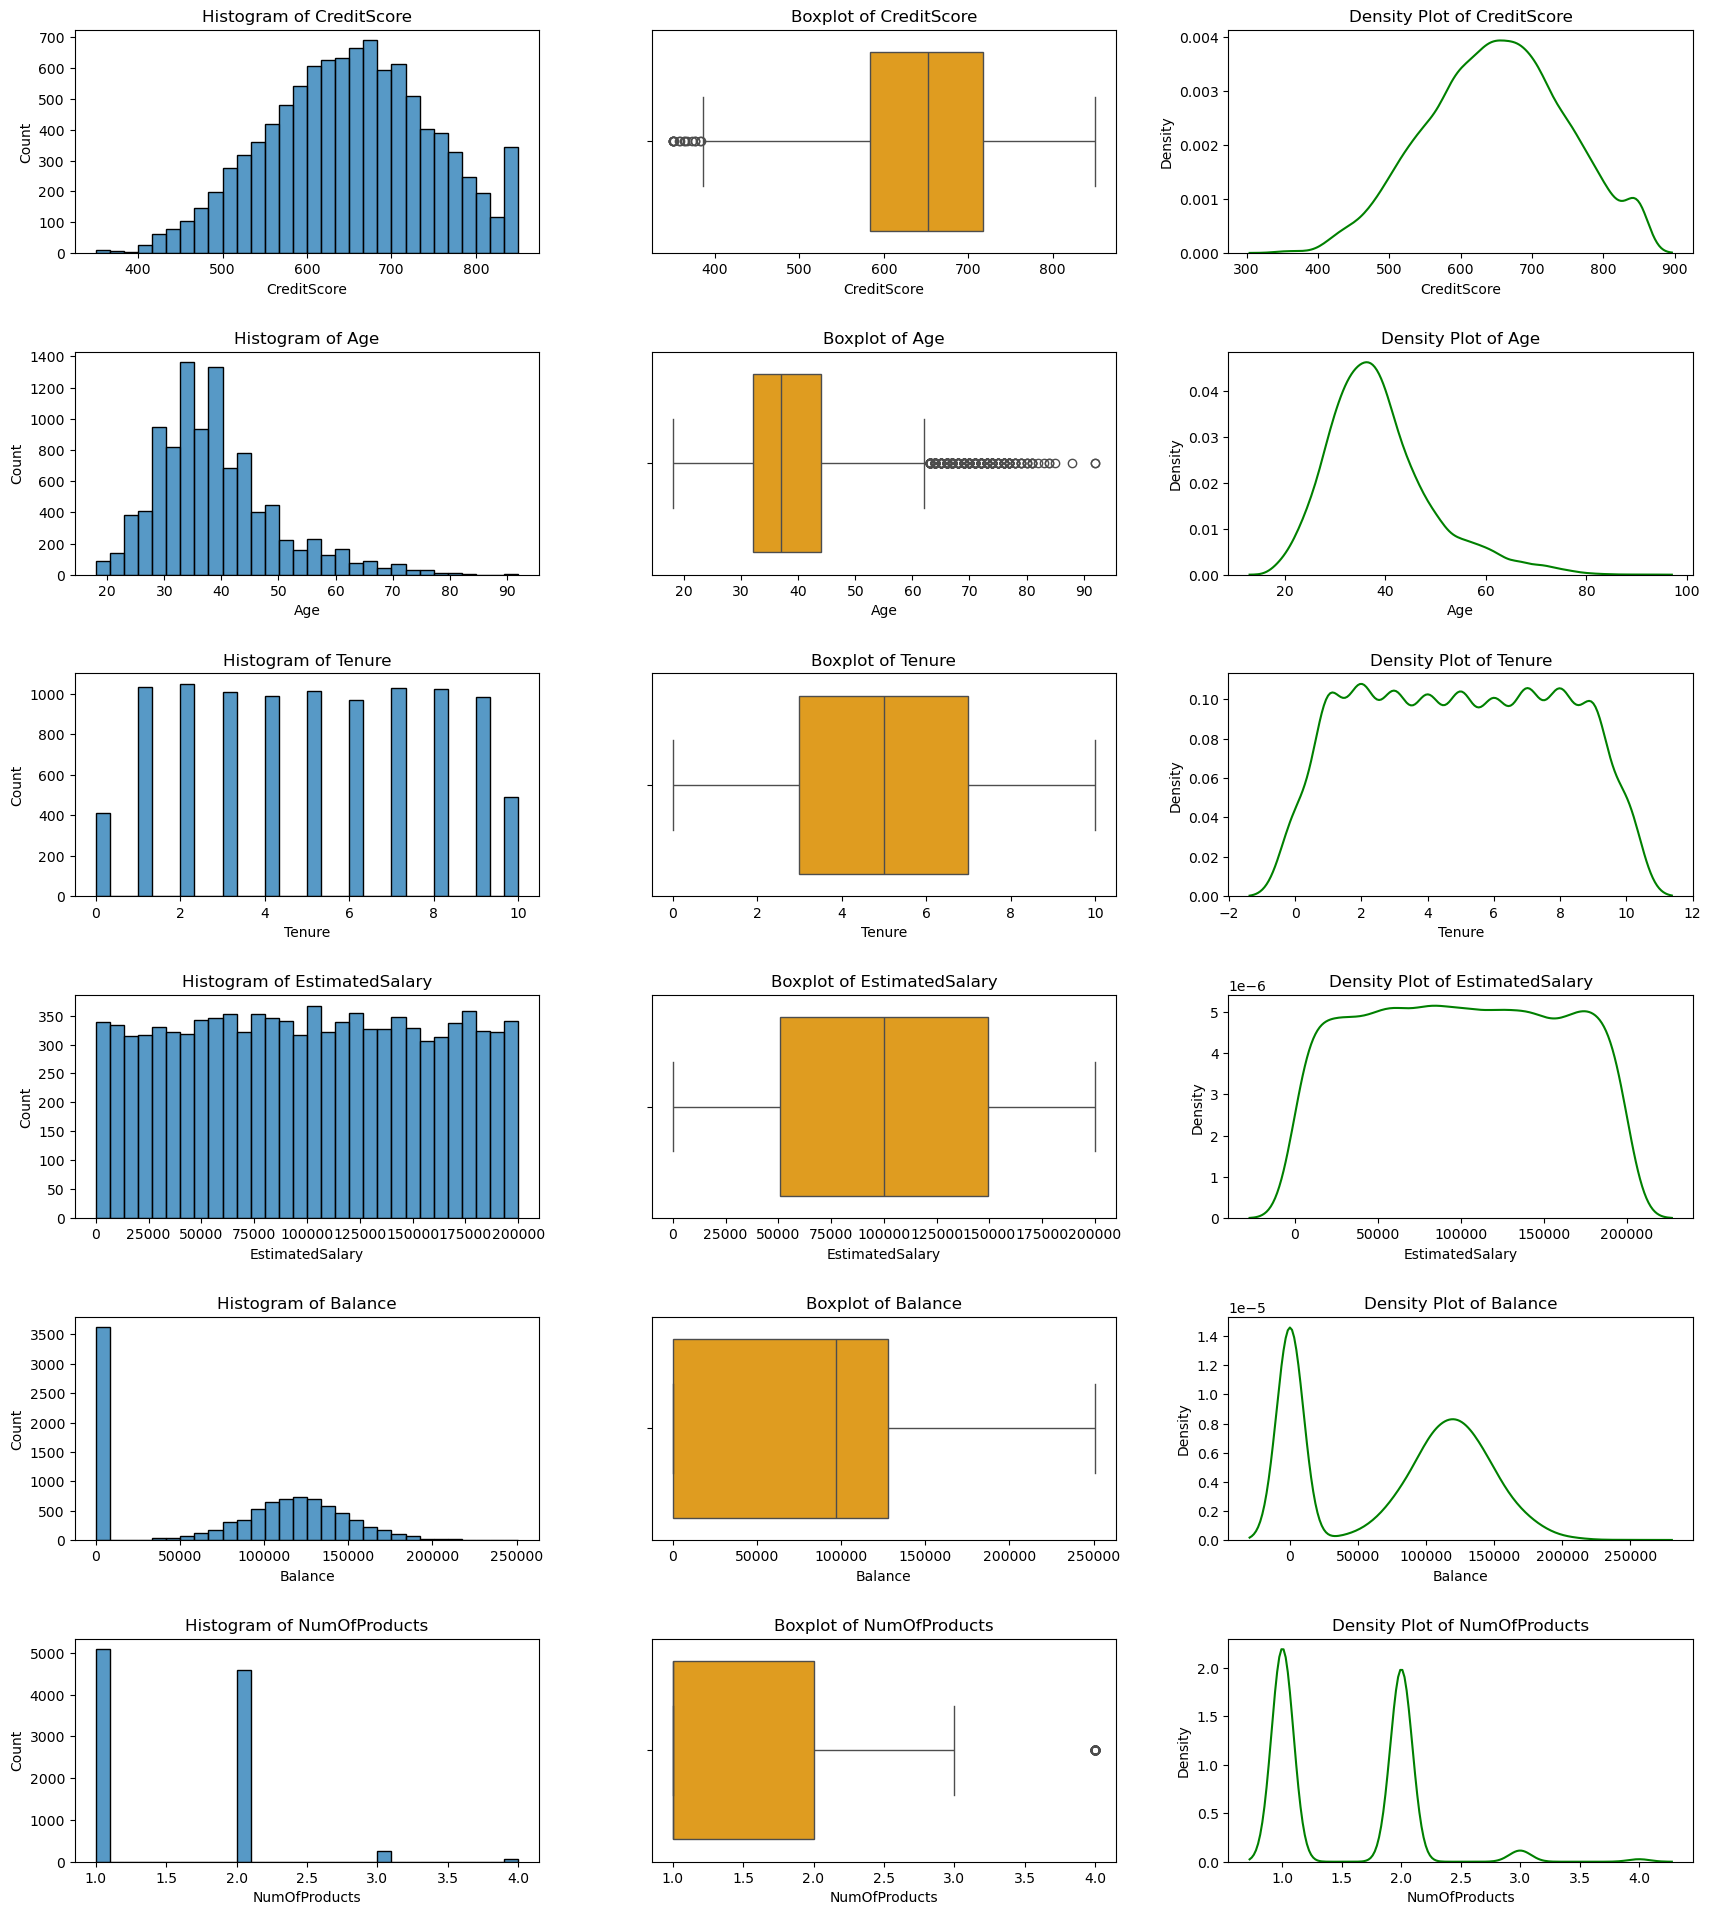

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('churn.csv')
# List of numerical columns to perform univariate analysis on
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary','Balance', 'NumOfProducts']

# Setting up the plotting area
fig, axes = plt.subplots(len(numerical_cols), 3, figsize=(18, 20))
fig.tight_layout(pad=5.0)

# Loop through and create histogram, box plot, and density plot
for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(df[col], bins=30, kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')


     # Density plot
    sns.kdeplot(df[col], ax=axes[i, 2], color='green')
    axes[i, 2].set_title(f'Density Plot of {col}')
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Boxplot of {col}')
    
   

# Display the plots
plt.show()




**Outcome of Analysis**

In the Univariate Analysis, various visual techniques like histograms, box plots, and density plots were used to understand the distribution of numerical variables. Below is a detailed explanation of the results:

**1.Histograms**: 

These plots illustrate the frequency distribution of each variable's values.

The **Age** variable is skewed towards younger individuals, peaking in the 0-40 range.


For **CreditScore**, most values fall between 600 and 850, indicating a fairly normal distribution.

**Balance** shows many customers with zero balance, along with a spread of other values.

The **NumOfProducts** variable shows that most customers own either 1 or 2 products.

**Tenure** shows a more uniform distribution.

EstimatedSalary displays a fairly even spread across its rane.

**2.Density Plots:**

These provide a smooth visualization of data distributions.

**Age** exhibits a slight peak around 40, while CreditScore and EstimatedSalary maintain relatively uniform distributions.

**Balance** has two prominent peaks—one at zero and another at higher balances.

**Tenure appears** to be evenly spread, while NumOfProducts shows most customers hold 1 or 2 products .


**3.Box Plots:**

These visualizations highlight central values, variability, and outliers.

**CreditScore** and **Age** show moderate variability, with CreditScore having lower-end outliers.

A large number of customers have no balance, while others exhibit a wide range of balances, including high outliers.

The **NumOfProducts**variable mostly centers on customers owning 1 or 2 products.

**EstimatedSalary** has a broad range of values, with a few outliers present.d range of values, with a few outliers present.2 products.

**EstimatedSalary** has a broad range of values, with a few outliers present.

## **4.2 Bivariate Analysis**

**Analyzing Relaionships and Depenencies** 

 
This section explores the connections between variable pairs to detect correlations and dependencie

1. **`Correlation Matrix`**: This matrix displays the strength and direction of relationships between variable pairs. Values range from -1 to 1: 
   - Close to 1 indicates a strong positive correlation (as one variable increases, so does the other).
   - Close to -1 indicates a strong negative correlation (as one increases, the other decreases).
   - Around 0 indicates no correlation.

   **Example:** A correlation of 0.29 between `Age` and `Exited` suggests that older customers are more likely to leave the bank.

2. **`Scatter Plot`**: This plot visualizes the relationship between two quantitative variables by displaying data points on a Cartesian plane, helping to identify patterns and outliers.

   **Example:** In an `Age vs. Balance` scatter plot, younger customers may show lower balances, while older customers have a wider range, highlighting distinct clusters.

3. **`Pair Plot`**: A grid of scatter plots that visualizes pairwise relationships among multiple variables, including histograms for individual distributions.

   **Example:** A pair plot of `Age`, `Balance`, and `Exited` can reveal that customers who exited (in a different color) cluster in specific areas, such as older individuals with lower balances.

**Useful Insights**

The results from these analyses can indicate which variables might be key predictors of customer churn. For instance, if there’s a strong negative correlation between balance and churn, it could suggest that customers with lower balances are more likelyto leave.  lower balancesto leave. o leave.o leave.

### 1 Corelation Matrix : Displays strength and relationships between variables

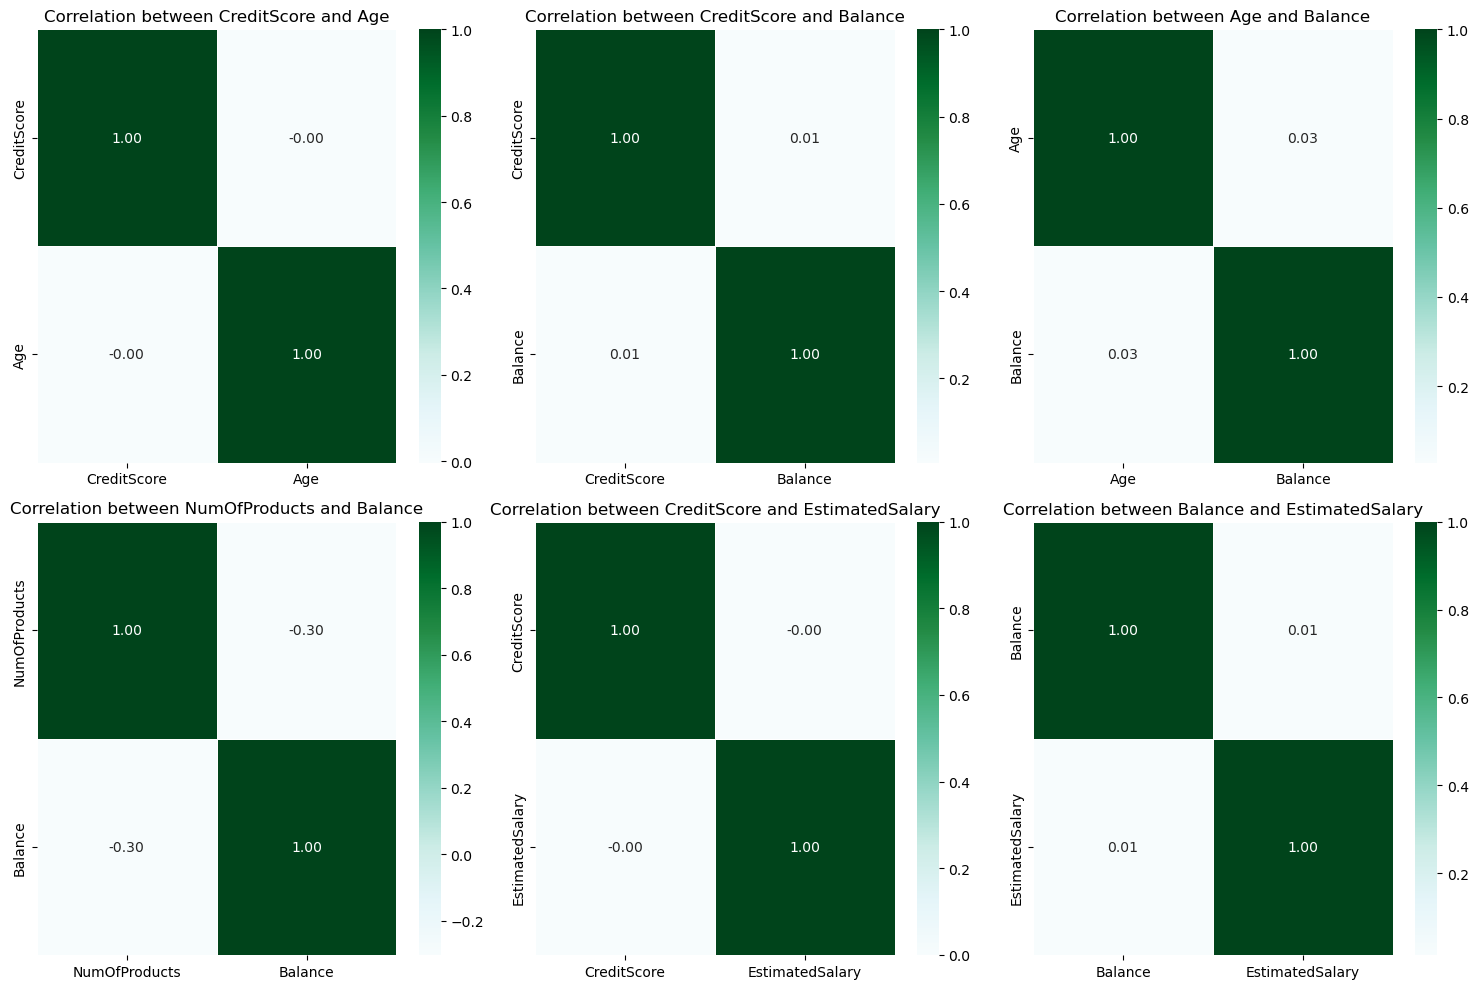

In [181]:


import seaborn as sns
import matplotlib.pyplot as plt

# Variable pairs for correlation analysis
variable_pairs = [
    ['CreditScore', 'Age'],
    ['CreditScore', 'Balance'],
    ['Age', 'Balance'],
    ['NumOfProducts', 'Balance'],
    ['CreditScore', 'EstimatedSalary'],
    ['Balance', 'EstimatedSalary']
]

# Set up 2x3 subplot grid
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes for easy iteration
axes = axes.ravel()

# Loop through variable pairs and plot heatmaps
for index, pair in enumerate(variable_pairs):
    # Correlation matrix for each pair (using 'df' instead of 'data')
    correlation = df[pair].corr()
    
    # Plot heatmap
    sns.heatmap(correlation, annot=True, cmap='BuGn', fmt='.2f', linewidths=0.5, ax=axes[index])
    axes[index].set_title(f'Correlation between {pair[0]} and {pair[1]}')

# Adjust layout
plt.tight_layout()
plt.show()




**Understanding Correlation Matrices:**

- **CreditScore vs. Age:**
  
  The correlation coefficient between CreditScore and Age is close to zero, indicating little to no linear association between these two variables.

- **CreditScore vs. Balance:**
  
  With a correlation coefficient of around 0.01, there is no meaningful linear relationship between a customer’s credit score and their bank balance.

- **Age vs. Balance:**
  
  The correlation between Age and Balance is approximately 0.03, suggesting a very weak or negligible relationship between these features.

- **NumOfProducts vs. Balance:**
  
  The correlation coefficient of -0.30 shows a weak negative relationship, implying that as the number of products a customer holds increases, their balance may slightly decrease.

- **CreditScore vs. EstimatedSalary:**
  
  The correlation between these variables is essentially zero, indicating that a customer’s credit score is not influenced by their estimated salary.

- **Balance vs. EstimatedSalary:**
  
  With a correlation coefficient of about 0.01, there is no significant link between a customer’s bala*UsefulInsightssalary.

- **Key Insights:**
  
  1. Most of the variable pairs exhibit extremely weak or no relationships, with correlation coefficients close to zero.
  
 2. Even though individual features show weak correlations, they can still contribute value to a predictive model when combined with other variables.
  
 3. This implies that many of these features might behave independently when used in models to predict outcomes such as customer churn.

hen combined with other variables.hen combined with other variables.

### 2 Scatter Plot : Relationship between quantitative variables 

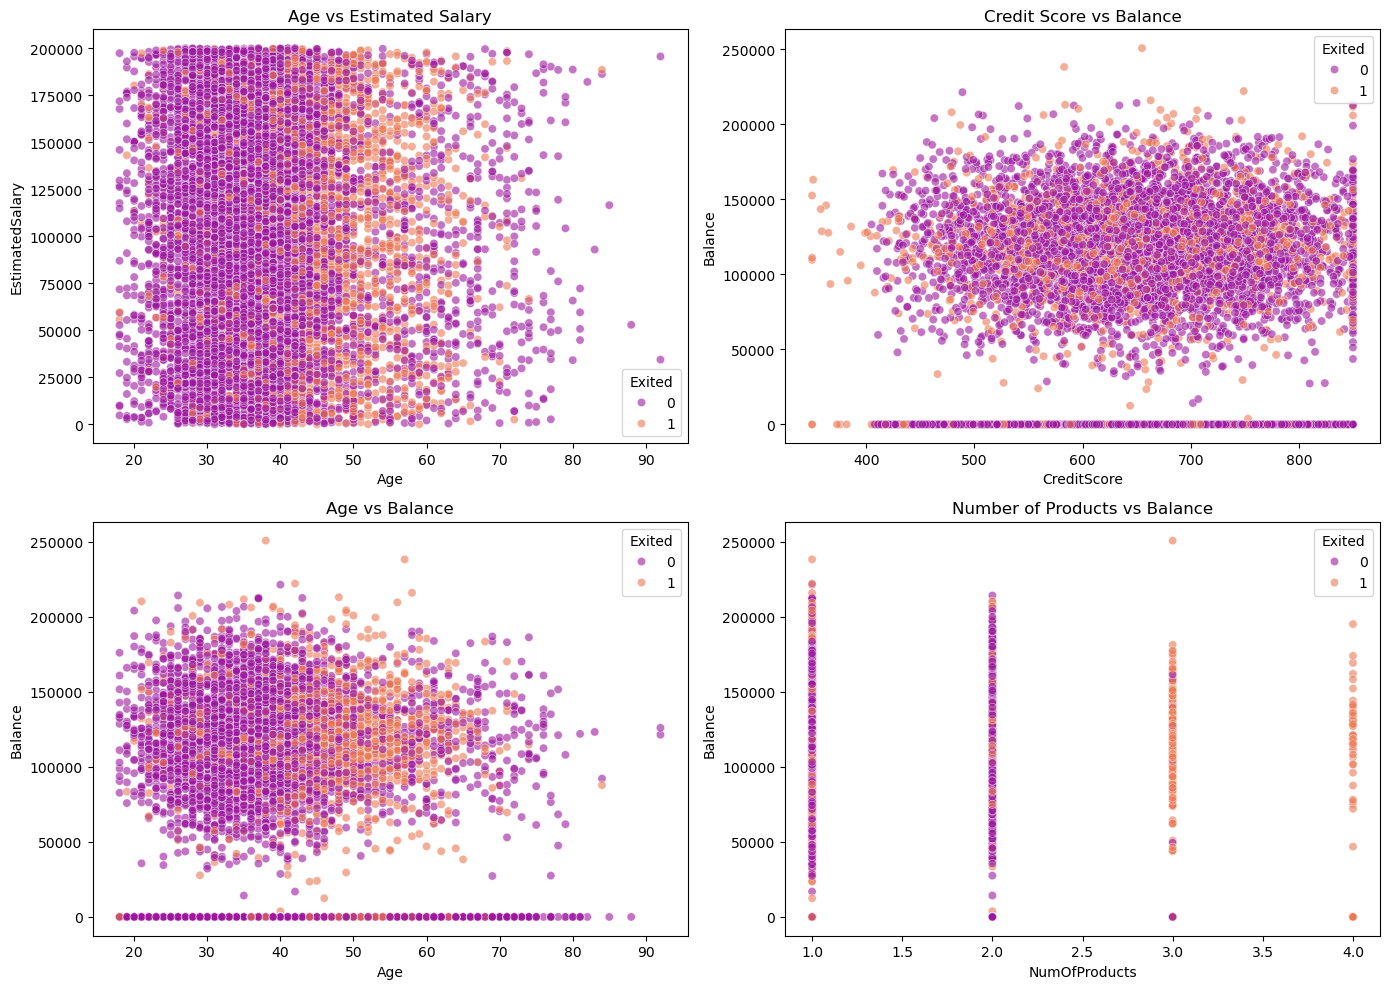

In [184]:
# Scatter plots to visualize variable relationships
plt.figure(figsize=(14, 10))

# Age vs Estimated Salary, colored by Exit
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Exited', palette='plasma', alpha=0.6)
plt.title('Age vs Estimated Salary')

# Credit Score vs Balance, colored by Exit
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='CreditScore', y='Balance', hue='Exited', palette='plasma', alpha=0.6)
plt.title('Credit Score vs Balance')

# Age vs Balance, colored by Exit
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited', palette='plasma', alpha=0.6)
plt.title('Age vs Balance')

# Number of Products vs Balance, colored by Exit
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='NumOfProducts', y='Balance', hue='Exited', palette='plasma', alpha=0.6)
plt.title('Number of Products vs Balance')

plt.tight_layout()
plt.show()


**Analysis of Scatter Plot**


The scatter plots displayed illustrate the relationships among various pairs of variables, with colors denoting whether a customer has exited (1) or remained (0). Below is an interpretation of each plot:

1. **Number of Products vs. Balance:**
   - This plot investigates the correlation between the number of products a customer owns and their corresponding bank balance.
   - Most customers have one or two products, with very few holding three or four.
   - Exited customers are scattered across different balances within each product category; however, those with fewer products (1-2) appear to have a higher churn rate compared to those with more products.

2. **Credit Score vs. Balance:**
   - This scatter plot analyzes the relationship between a customer’s credit score and their bank balance.
   - The points are distributed evenly across the credit score spectrum, indicating a lack of significant correlation between credit score and balance.
   - Customers who have exited are interspersed throughout, suggesting that credit score does not serve as a strong distinguishing factor between those who have exited and those who remain.

3. **Age vs. Estimated Salary:**
   - This plot examines the link between customers' ages and their estimated salaries.
   - The distribution spans a wide range of ages and salary levels, with no clear trend visible.
   - Both exited and non-exited customers are evenly represented across various salary brackets, indicating that estimated salary might not be a robust predictor of customer churn on its own.

4. **Age vs. Balance:**
   - This scatter plot explores how customer age relates to their bank balance.
   - A significant number of customers, particularly those with zero balances, are present across different age groups.
   - There is a notable concentration of exited customers among older individuals with non-zero balances, suggesting that age could play a role in churn, especially for customers witUseInsights ces.

**Key Takeaways:**
- The visual representations indicate that while certain variables, like age, may have a minor connection to churn, others, such as estimated salary and credit score, do not exhibit a strong link to customer exit.
- The presence of customers with zero balances across all groups implies that having a balance is not necessarily a decisive factor in predicting exits.
- This analysis indicates that accurately predicting churn may require considering a combination of various factors rather than relying on a single variable.

### 3. Pair Plot : Sows pairwise relationships for quick insights to know realtionships between various variables 

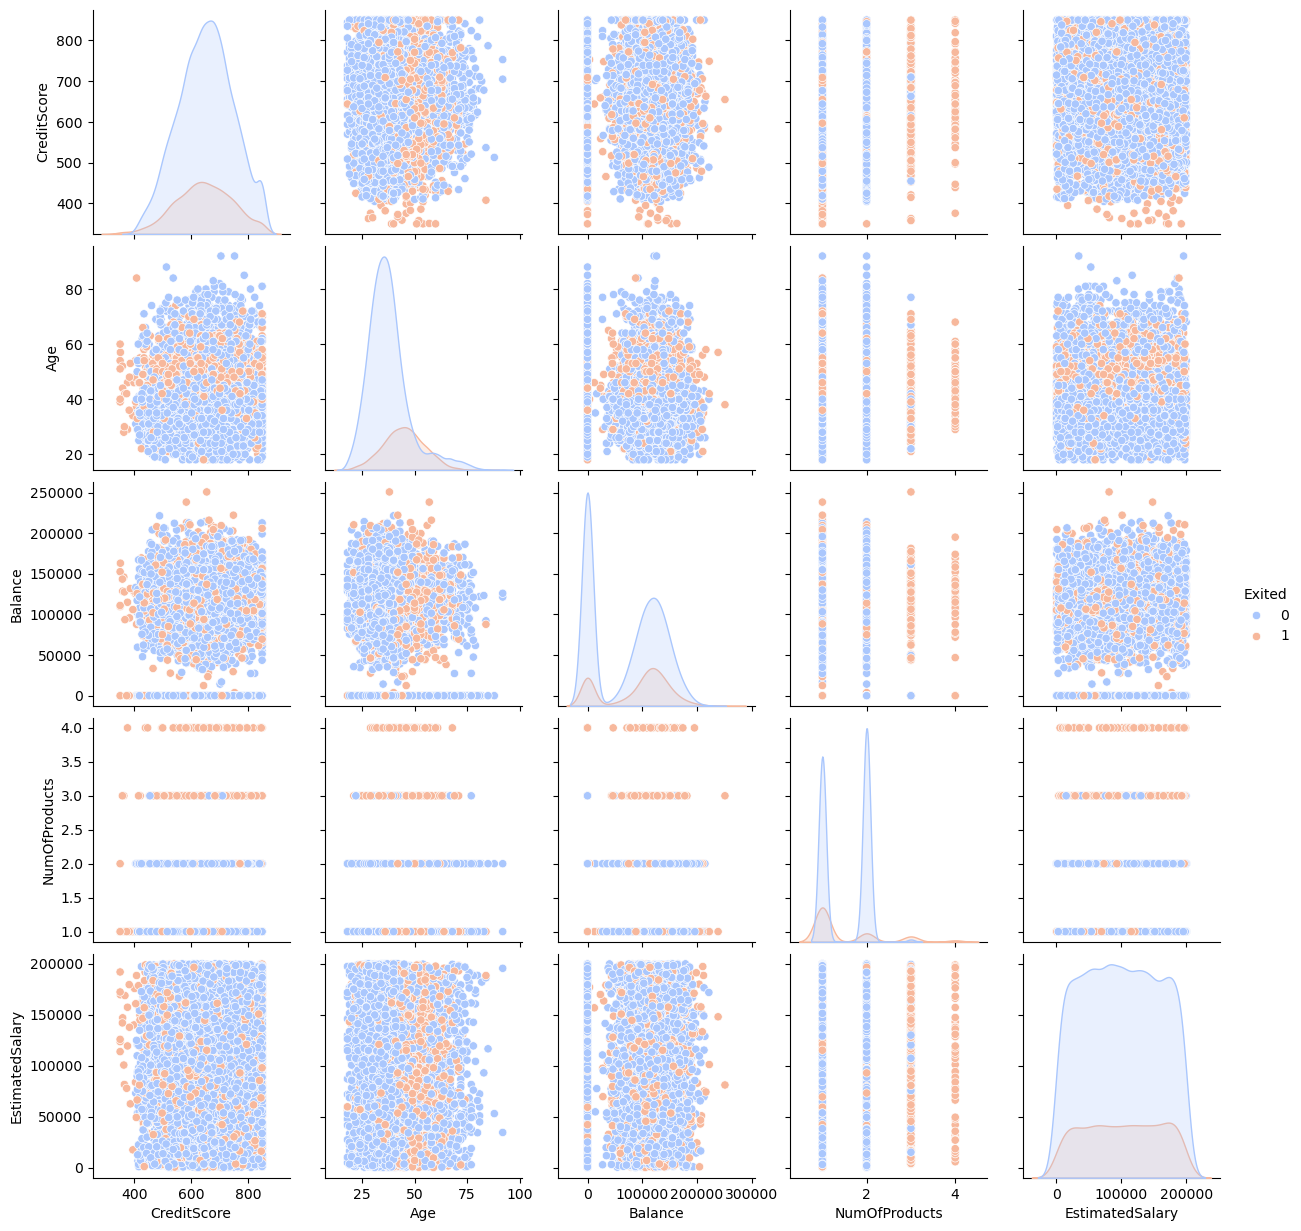

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose variables for the pair plot
subset_df = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']]

# Generate pair plot, colored by 'Exited'
sns.pairplot(subset_df, hue='Exited', palette='coolwarm')

# Display the plot
plt.show()




The **pair plot** illustrates the interrelationships among several variables in the dataset, with points color-coded according to the `Exited` status (blue for 0, representing customers who remained, and orange for 1, indicating those who exited).

**Observations from the Plots:**

**Diagonal Histograms:**
- **CreditScore:** The distribution displays a slight skew, with many customers scoring between 600 and 700, showing no significant distinction between those who stayed and those who exited.
- **Age:** There is a noticeable tendency for older customers to exit, as indicated by a higher density of orange points in the older age brackets.
- **Balance:** A considerable number of customers have a balance of zero, while those who exited (orange) show a more diverse distribution in terms of balance.
- **NumOfProducts:** The majority of customers have either one or two products, with very few holding three or four. There appears to be a slight increase in exits (orange) among customers with a larger number of products.
- **EstimatedSalary:** The distribution of salaries is relatively even, without a clear distinction between the exit statuses of customers.

**Off-Diagonal Scatter Plots:**

- **CreditScore vs. Age:** There is no evident pattern linking these two variables, as points are dispersed for both groups of customers.
- **CreditScore vs. Balance:** Similar to the previous plot, no strong correlation exists here, and exits (orange) are scattered across different combinations of credit scores and balances.
- **Age vs. Balance:** Older customers (above 50) with varying balances are more likely to exit, as shown by the greater concentration of orange points.
- **NumOfProducts vs. Balance:** Customers with three or four products tend to have higher balances; however, no clear pattern of exit status emerges from this relationship.
- **Balance vs. EstimatedSalary:** There is no discernible correlation between balance and salary, and customers exit independently of their salary levels.

**Useful Insights:**
- Age appears to be the most influential factor in determining whether a customer exits, with older individuals more inclined to leave.
- The balance distribution indicates that customers with zero or excessively high balances might be at a greater risk of exiting.
- Other factors, such as CreditScore, NumOfProducts, and EstimatedSalary, do not exhibit strong direct correlations with exit status.


### **4.3 Multivariate Analysis**

Multivariate analysis examines interactions among three or more variables, providing insights into complex relationships and patterns within the dataset.

1. **Heatmap:**  
   A heatmap visualizes correlations among multiple variables using color gradients to indicate the strength and direction of relationships.  
   - **Example:** In the correlation heatmap for `Age`, `Balance`, `NumOfProducts`, and `Exited`, a moderate positive correlation (0.29) exists between `Age` and `Exited`, while a negative correlation (-0.30) is observed between `NumOfProducts` and `Balance. These correlations help identify key factors related to customer churn.

2. **Pairwise Relationships:**  
   This technique analyzes relationships among multiple variables by assessing pairs together, revealing clusters and outliers.  
   - **Example:** A pair plot for `Age`, `Balance`, `NumOfProducts`, and `Exited` shows that customers who exited tend to cluster in specific areas, highlighting shared characteristics that influence churn behavior.

3. **Principal Component Analysis (PCA):**  
   PCA reduces dimensionality by transforming the dataset into uncorrelated variables known as principal components, facilitating visualization of data.  
   - **Example:** Applying PCA to `Age`, `Balance`, and `Estimated Salary` reduces the data to two or three components, clearly distinguishing clusters of customers who churned from those who stayed.

**Key Insights**:

The analysis of multiple variables uncovers intricate relationships and interactions. For example, PCA helps illustrate how distinct groups of customers—those who have churned versus those who have not—can be differentiated based on their characteristics, thereby assisting in the identification of fundamental factors that influence customer churn.

### 1.Heat Map

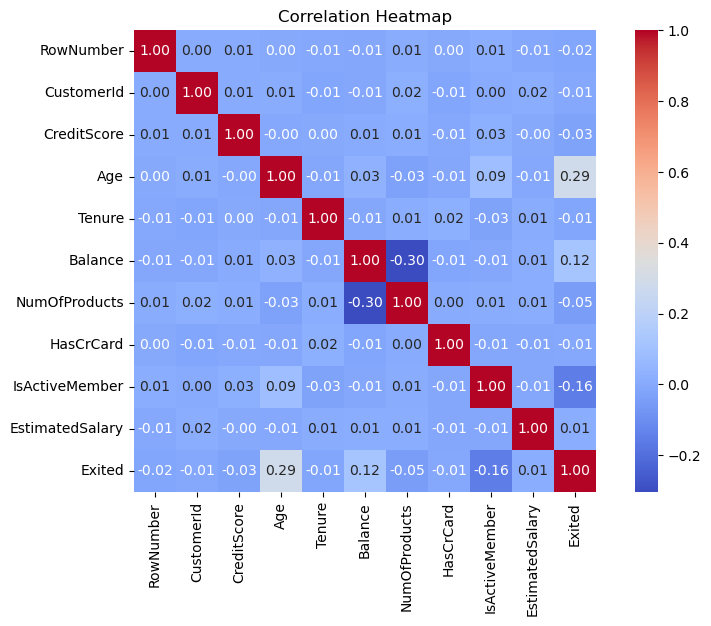

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset and drop non-numeric columns
df = pd.read_csv('Churn.csv')
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Generate the correlation heatmap for 'Exited'
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()




### Analysis of Heat Map:
The **heatmap** illustrates the correlations between various numerical variables in the dataset, with values ranging from -1 to 1. Here’s a summary of the key findings:

**Key Observations:**

- **CreditScore:**  
  Shows no strong correlation with other variables, exhibiting very weak relationships with `Exited` (-0.03), `Balance` (0.01), `NumOfProducts` (0.01), and `EstimatedSalary` (0.00), indicating it is largely independent of these features.

- **Age:**  
  Displays a moderate positive correlation with `Exited` (0.29), suggesting that older customers are more likely to leave the bank. However, it has weak correlations with other variables, which are close to zero.

- **Tenure:**  
  Has a weak negative correlation with `NumOfProducts` (-0.30), indicating that longer-tenured customers tend to have fewer products. Overall, tenure shows little to no correlation with other variables.

- **Balance:**  
  Shows a weak positive correlation with `Exited` (0.12), implying that customers with higher balances are somewhat more likely to exit. It is also negatively correlated with `NumOfProducts` (-0.30), suggesting that higher balances correspond with fewer products held.

- **NumOfProducts:**  
  Displays a moderate negative correlation with `Balance` (-0.30) and a very weak negative correlation with `Exited` (-0.05), indicating that customers with more products are slightly less likely to leave.

- **EstimatedSalary:**  
  Shows no significant correlation with any other variable, as all correlation values are nearly zero, suggesting salary does not influence customer behavior.

- **Exited:**  
  Exhibits notable correlations with:
  - **Age** (0.29): Older customers are more likely to exit.
  - **Balance** (0.12): Higher balance customers are slightly more likely to exit.
  - Weak correlations are seen with `CreditScore` (-0.03), `NumOfProducts` (-0.05), and `Tenure` (-0.01).

**Insights:**

- The most significant correlation is between `NumOfProducts` and `Balance` (-0.30), indicating that customers with fewer products generally have higher balances.
- `Age` and `Exited` show a moderate positive correlation (0.29), revealing that older customers tend to exit more frequently.
- `Tenure` has a weak connection with `NumOfProducts` but shows minimal impact on other variables.
- Variables such as `CreditScore`, `EstimatedSalary`, and `Tenure` exhibit negligible correlations, indicating they do not strongly relate to other factors in this dataset.
- In summary, `Age` and `Balance` significantly influence customer churn, but a comprehensive multivariate analysis is needed to fully understand the dynamics in- 
erstand the dynamics involved.

--- 


### 2. Pairwise Relationships

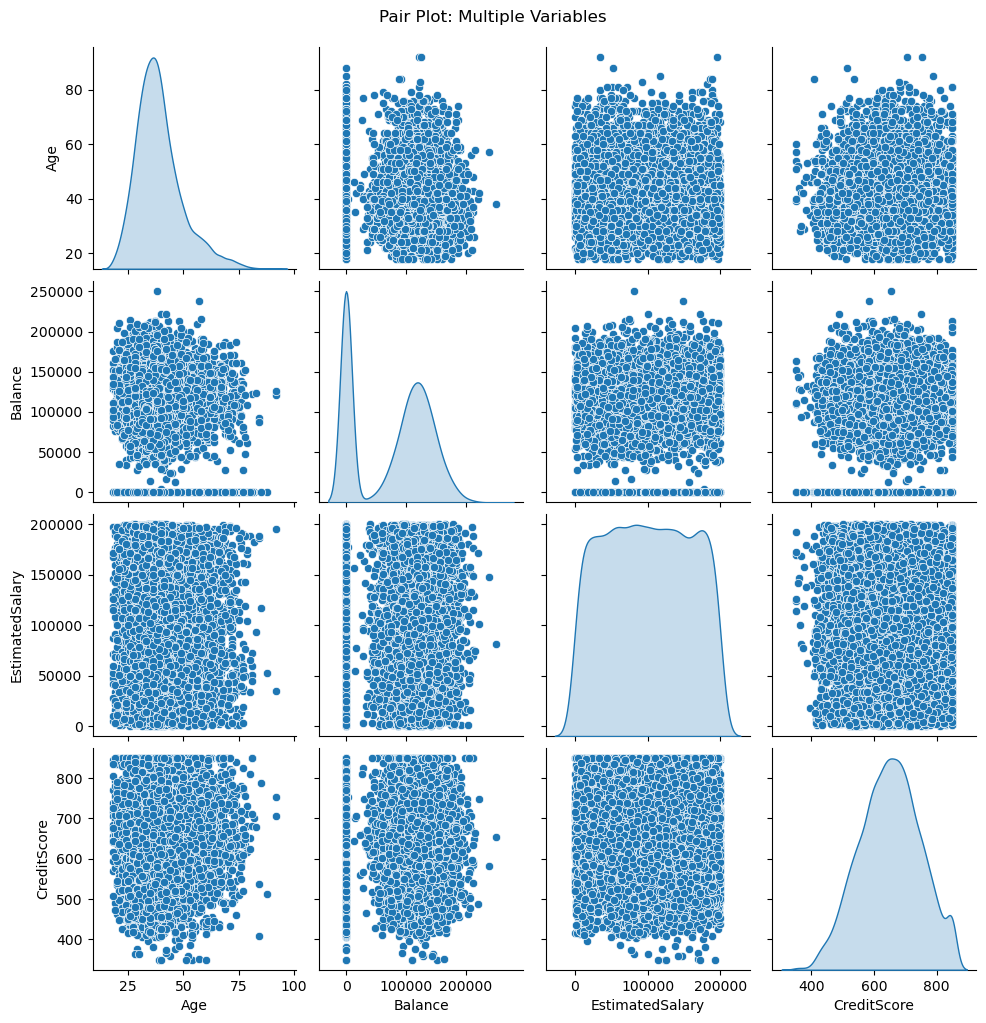

In [194]:
# Pair plot for multiple variables
df = pd.read_csv('Churn.csv')
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
sns.pairplot(df[['Age', 'Balance', 'EstimatedSalary', 'CreditScore']], diag_kind='kde')
plt.suptitle('Pair Plot: Multiple Variables', y=1.02)
plt.show()



### Analysis of Pairwise relationships 

**Visualizing Relationships Between Variables:**

The plot illustrates pairwise relationships among variables such as `CreditScore`, `Age`, `Balance`, `NumOfProducts`, `EstimatedSalary`, `Tenure`, and the target variable `Exited`. Points are color-coded, with blue indicating customers who did not exit (0) and orange representing those who did (1).

**Key Observations:**

- **Age vs. Exited:** Older customers show a higher likelihood of exiting, while younger customers tend to stay.
- **Balance vs. Exited:** Higher balance customers are more inclined to exit, whereas many with a zero balance remain.
- **NumOfProducts vs. Exited:** Most exits are from customers with 1 or 2 products, with fewer exits among those with 3 or more.
- **CreditScore vs. Exited:** No clear linear trend is observed, but certain clusters appear around specific scores.
- **Tenure vs. Exited:** Tenure among exiting customers varies widely, with no distinct trend.
- **EstimatedSalary vs. Exited:** Salary does not show a strong correlation with exit status, as both groups are similarly distributed across the salary range.

**Diagonal Density Plots:**

These plots depict the distribution of each variable for both groups (`Exited` = 0 and `Exited` = 1). For example, older customers tend to have a higher density of exits, while balance distribution indicates that those with higher balances are more likely to exit.

**Insights:**

The pair plot effectively reveals patterns in how variables relate to the `Exited` status, particularly with `Age`, `Balance`, and `NumOfProducts`. These relationships may be valuable for predictive modeling.



### 3.Principal Component Analysis (PCA)

PCA (Principal Component Analysis) is a technique used for reducing the dimensionality of a dataset by converting it into a set of fewer uncorrelated variables known as principal components. These components are designed to retain the maximum amount of variance from the original data, simplifying analysis while preserving essential information.

Data types of features:
 CreditScore        float64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
EstimatedSalary    float64
dtype: object
Shape of standardized data (x): (9991, 6)
First few rows of standardized data:
 [[-0.32620465  0.29331642 -1.04127077 -1.22657521 -0.91134339  0.02204652]
 [-0.44002499  0.19799002 -1.38708038  0.11665266 -0.91134339  0.21671796]
 [-1.5368391   0.29331642  1.03358688  1.33238329  2.52783766  0.2408741 ]
 [ 0.50157958  0.0073372  -1.38708038 -1.22657521  0.80824713 -0.10877413]
 [ 2.06402232  0.38864283 -1.04127077  0.78504555 -0.91134339 -0.36516384]]


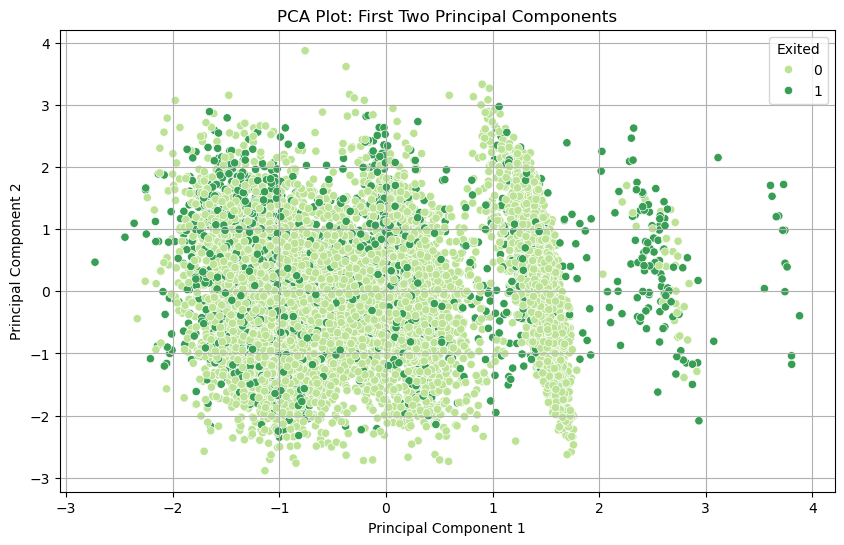

Explained Variance Ratio: [0.21851571 0.16893716]


In [197]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Churn.csv')

# Drop rows with missing values
df_cleaned = df.dropna()

# Select numerical features for PCA
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Check for non-numeric data in the features
print("Data types of features:\n", df_cleaned[features].dtypes)

# Ensure all features are numeric
if not all(pd.api.types.is_numeric_dtype(df_cleaned[feature]) for feature in features):
    raise ValueError("Some features are not numeric!")

# Standardize the features
x = StandardScaler().fit_transform(df_cleaned[features])  # Use cleaned DataFrame

# Check the shape and some data of the standardized features
print("Shape of standardized data (x):", x.shape)
print("First few rows of standardized data:\n", x[:5])  # Print first 5 rows

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the data with PCA
try:
    principal_components = pca.fit_transform(x)
except ValueError as e:
    print("Error during PCA fitting:", e)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Exited'] = df_cleaned['Exited'].values  # Use cleaned DataFrame for target variable

# Visualize the principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Exited', palette='YlGn')
plt.title('PCA Plot: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Calculate and print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


### Analysis of Output:

The data has been condensed into two principal components (Principal Component 1 and Principal Component 2) from the original features: 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', and 'EstimatedSalary'.

**Key Aspects of the PCA Plot:**

- **Principal Components**: 
  - **Principal Component 1** (x-axis) captures the highest variance, while **Principal Component 2** (y-axis) captures the second-highest variance. Together, they provide a simplified 2D representation of the dataset while retaining essential information.

- **Color Coding by Exited Status**: 
  - The points are color-coded, with blue indicating customers who did not exit (0) and orange representing those who exited (1). This visualization highlights the relationship between the target variable ('Exited') and the principal components.

- **Class Separation**: 
  - While some overlap exists between the blue and orange points, indicating that PCA alone does not completely separate the two classes, clusters of orange points to the right suggest that exited customers possess distinct characteristics. This implies that additional methods or more dimensions may be necessary for better classification.

- **Variance Explained**: 
  - The variance captured by **Principal Component 1** and **Principal Component 2** can be assessed using `pca.explained_variance_ratio_`. 
  - Specifically, **Principal Component 1** accounts for approximately 21.85% of the variance, and **Principal Component 2** captures about 16.89%. Together, they explain roughly 38.75% of the total variance in the dataset. While this indicates a moderate retention of the original variability, more components may be required to capture additional variance effectively.

**Insight**: 
The PCA plot effectively projects multi-dimensional data into 2D space, revealing clusters and relationships between features and the target variable 'Exited'. However, the observed overlap suggests that a simple PCA may not sufficiently distinguish between exited and non-exited customers. Using additional components or more sophisticated techniques could enhance the separation.ance the separation.

## **5.EDA Findings and Overall Analysis**



### 5.1 Overview of EDA Findings

The exploratory analysis of customer data provided several important insights regarding factors associated with customer churn:

- **Demographic Correlations**: A moderate positive correlation (0.29) was found between Age and Exited status, showing that older customers are more likely to leave the bank.

- **Balance Patterns**: Customers with higher balances were slightly more likely to exit, though the correlation was weak (0.12). Additionally, a negative correlation of -0.30 between the number of products and balance suggests that customers with fewer products tend to have higher balances.

- **Weak Relationships**: Variables like CreditScore and EstimatedSalary exhibited little to no significant correlation with churn, indicating they play a limited role in predicting customer exit behavior.

- **Visual Insights**: Scatter and pair plots revealed that customers who exited shared certain characteristics, particularly in relation to Age and Balance.

### 5.2 Enhanced Insights

The analysis uncovered several additional patterns worth noting:

- **Demographic Insights**: A significant proportion of customers who exited had lower credit scores and balances, suggesting that financial stability may play a crucial role in customer retention.

- **Geographical Trends**: Customers from specific regions exhibited higher churn rates, indicating that geographical factors may influence customer satisfaction and retention.

- **Behavioral Patterns**: The data showed that active members with multiple products were less likely to churn, highlighting the importance of customer engagement and product diversification.

### 5.3 Strategic Implications

The findings suggest several key implications for developing effective retention strategies:

- **Target Older Customers**: The correlation between age and churn suggests that banks should consider crafting marketing strategies aimed at retaining older customers.

- **Retention Focus on Low-Balance Customers**: Customers with lower balances appear to be at greater risk of leaving. Offering them personalized financial guidance or incentives could improve retention rates.

- **Encourage Product Diversification**: Given the negative correlation between the number of products and balance, encouraging customers to diversify their banking products may enhance their engagement and loyalty.

- **Non-impactful Factors**: Since CreditScore and EstimatedSalary showed little relationship with churn, these variables may not be useful for segmentation or targeted retention strategies.

### 5.4 Limitations and Considerations

While this analysis provides valuable insights, several limitations must be taken into account:

- **Data Quality**: The results rely on the quality and completeness of the dataset. Missing or inaccurate data could affect the findings.

- **Correlation vs. Causation**: While correlations were identified, they do not confirm causality. More in-depth studies are necessary to establish clear cause-and-effect relationships.

- **Time Factor**: The analysis does not account for changes over time, such as fluctuations in customer behavior or external factors like economic conditions, which might impact churn rates.

- **Limited Scope**: The focus on quantitative analysis may have overlooked qualitative aspects, such as customer satisfaction and experience, which are also critical for understanding churn.





## *References*

1. **DataCamp**. "An Introduction to Exploratory Data Analysis." Available at: [DataCamp](https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python)

2. **Seaborn Documentation**. "Seaborn Overview." Available at: [Seaborn](https://seaborn.pydata.org/)

3. **Matplotlib Documentation**. "Matplotlib User Guide." Available at: [Matplotlib User Guide](https://matplotlib.org/stable/users/index.html)

4. **Medium**. "A Comprehensive Guide to Exploratory Data Analysis (EDA)." Available at: [Medium](https://medium.com/@datawhale/a-comprehensive-guide-to-exploratory-data-analysis-eda-1e8f0a14db47)

5. **Kaggle**. "Customer Churn Analysis with Python." Available at: [Kaggle](https://www.kaggle.com/learn/intro-to-machine-learning) 

6. **Towards Data Science.** "Exploratory Data Analysis (EDA) Visualization Using Pandas." Available at: https://towardsdatascience.com/exploratory-data-analysis-eda-visualization-using-pandas-ca5a04271607

5. **Kaggle.** "Bank Customer Churn Prediction Dataset." Available at: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction